17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 221ms/step - accuracy: 0.5498 - loss: 0.6912 - val_accuracy: 0.6420 - val_loss: 0.6521
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - accuracy: 0.7284 - loss: 0.5715 - val_accuracy: 0.8054 - val_loss: 0.4485
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 225ms/step - accuracy: 0.8333 - loss: 0.3910 - val_accuracy: 0.7940 - val_loss: 0.4412
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 206ms/step - accuracy: 0.8669 - loss: 0.3192 - val_accuracy: 0.8312 - val_loss: 0.3872
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 217ms/step - accuracy: 0.8509 - loss: 0.3691 - val_accuracy: 0.8204 - val_loss: 0.4061
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.8355 - loss: 0.3930 - val_accuracy: 0.8050 - val_loss: 0.4594
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 208ms/step - accuracy: 0.8758 - loss: 31.4601 - val_accuracy: 0.6614 - val_loss: 0.6323
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.7244 - loss: 

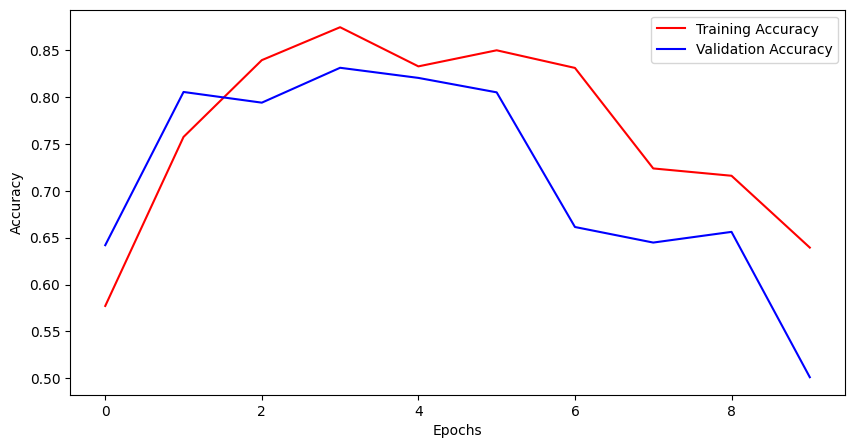

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load IMDB Dataset (Keep Top 10,000 Words)
vocab_size = 10000  # Number of words to keep
max_length = 500  # Maximum length of a review
embedding_dim = 32  # Dimension of word embeddings

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)

#  Step 2: Pad Sequences to Ensure Uniform Length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

#  Step 3: Build the RNN Model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    keras.layers.SimpleRNN(64, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # Binary Classification (Positive/Negative)
])

#  Step 4: Compile Model
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#  Step 5: Train Model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

#  Step 6: Evaluate Model Performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

#  Step 7: Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy", color="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#  Step 8: Make Predictions on New Reviews
def predict_review(review):
    # Load IMDB word index
    word_index = keras.datasets.imdb.get_word_index()

    # Tokenize and preprocess input review
    words = review.lower().split()
    sequence = [word_index.get(word, 2) + 3 for word in words]  # 3 for offset
    sequence = keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_length)

    prediction = model.predict(sequence)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100
    print(f"Prediction: {sentiment} ({confidence:.2f}% confidence)")

# Example Usage:
# predict_review("The movie was absolutely amazing with great acting.")
# predict_review("I hated the film. It was the worst experience ever.")
